**Table of Contents**
* [Introduction](#introduction)
* [Importing Libraries](#import)
* [Importing Data](#data)
* [Plots](#plots)
    - [Boxplot](#boxplot)
    - [Countplot](#countplot)
    - [Heatmap](#heatmap)
    - [Pairplot](#pairplot)
* [Data Preprocessing](#prep)
    - [Label Encoding](#label)
    - [One Hot Encoding](#ohe)
* [ML Models](#ml)
* [CONCLUSION](#conclusion)

<a id="introduction"></a>
**INTRODUCTION**

* A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.

* A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.


![](https://images.medicinenet.com/images/article/main_image/stroke-symptoms-and-treatment.jpg)

<strong> Attribute Information </strong>
*  id: unique identifier
*  gender: "Male", "Female" or "Other"
*  age: age of the patient
*  hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
*  heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
*  ever_married: "No" or "Yes"
*  work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*  Residence_type: "Rural" or "Urban"
*  avg_glucose_level: average glucose level in blood
*  bmi: body mass index
*  smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
*  stroke: 1 if the patient had a stroke or 0 if not <br>

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


<a id="import"></a>
# Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

<a id="data"></a>
# Importing Data

In [3]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.drop(['id'], axis = 1, inplace=True)

In [6]:
df.sample(6)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3787,Female,18.0,0,0,No,Private,Urban,95.87,23.0,never smoked,0
3404,Female,36.0,0,0,Yes,Private,Urban,96.70,31.4,Unknown,0
1782,Female,59.0,0,0,Yes,Private,Rural,234.82,51.8,never smoked,0
4794,Male,8.0,0,0,No,children,Rural,108.06,14.6,Unknown,0
3612,Male,17.0,0,0,No,Private,Rural,83.26,32.9,never smoked,0
3154,Female,65.0,0,0,Yes,Private,Rural,82.83,27.8,formerly smoked,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


**Printing the informations about stroke data**

In [9]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values : \n",df.nunique())

Rows     :  5110
Columns  :  11

Features : 
 ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing values :   201

Unique values : 
 gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


**Let's find out what is missing**

In [10]:
df.isnull().sum().sort_values(ascending=False)[:]

bmi                  201
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<a id="boxplot"></a>
# BoxPlot

<AxesSubplot:xlabel='avg_glucose_level'>

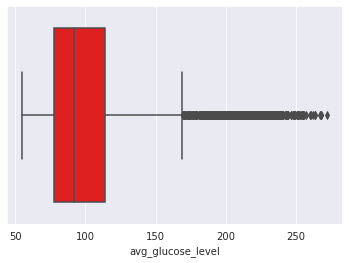

In [13]:
sns.boxplot(x='avg_glucose_level',data=df, color='Red')

<AxesSubplot:xlabel='bmi'>

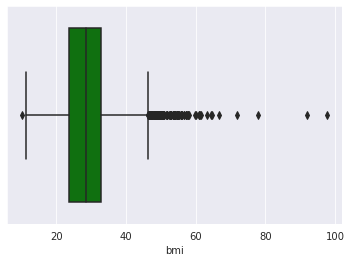

In [14]:
sns.boxplot(x='bmi',data=df, color = 'Green')

<AxesSubplot:xlabel='age'>

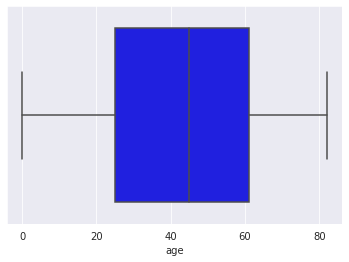

In [15]:
sns.boxplot(x='age',data=df , color = 'Blue')

* Age mostly distributed between approximately 25 and 62 

<a id="countplot"></a>
# Countplots

Text(0.5, 1.0, 'Stroke / Ever-Married')

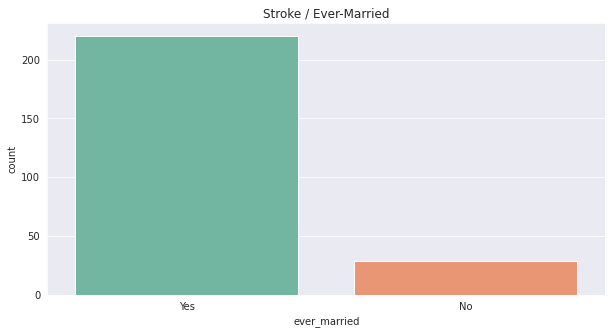

In [16]:
plt.figure(figsize=(10,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='ever_married', palette="Set2")
plt.title("Stroke / Ever-Married")

**Looks like  the number of married people tend to have stroke significantly higher than single people
!Interesting**

Text(0.5, 1.0, 'Stroke / Work Type')

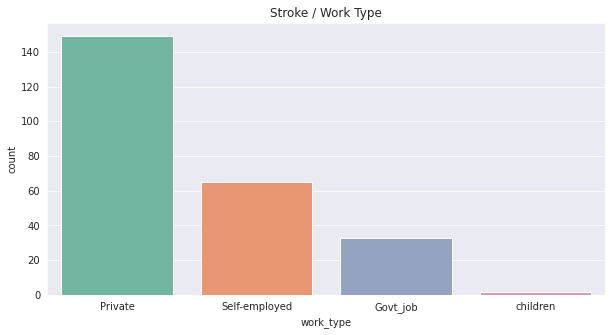

In [17]:
plt.figure(figsize=(10,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='work_type', palette="Set2")
plt.title("Stroke / Work Type")

* People in private sector has higher risk of having a stroke

Text(0.5, 1.0, 'Stroke / Smoking Status')

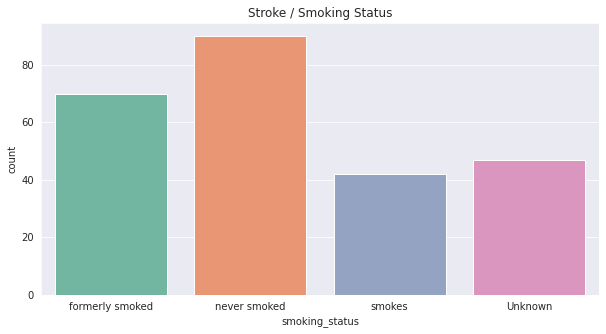

In [18]:
plt.figure(figsize=(10,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='smoking_status', palette="Set2")
plt.title("Stroke / Smoking Status")

* In total of former smokers and currently smokers has the highest risk 

Text(0.5, 1.0, 'Stroke / Residence Type')

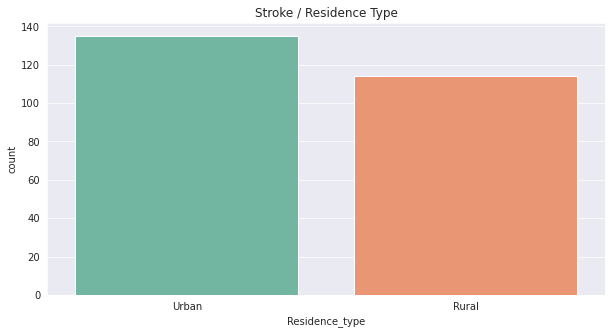

In [19]:
plt.figure(figsize=(10,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='Residence_type', palette="Set2")
plt.title("Stroke / Residence Type")

* Now we have a close distribution of rural and urban type of residence. Looks like it does not effect much

Text(0.5, 1.0, 'Stroke / Hypertension')

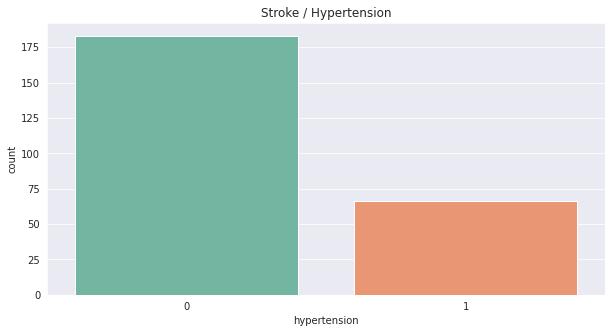

In [20]:
plt.figure(figsize=(10,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='hypertension', palette="Set2")
plt.title("Stroke / Hypertension")

* People without hypertension has more risk to have a stroke

Text(0.5, 1.0, 'Stroke / Heart Disease')

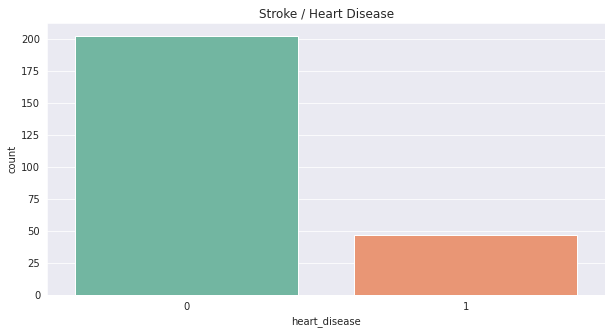

In [21]:
plt.figure(figsize=(10,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='heart_disease', palette="Set2")
plt.title("Stroke / Heart Disease")

* People without any previous heart disease has more risk to have a stroke

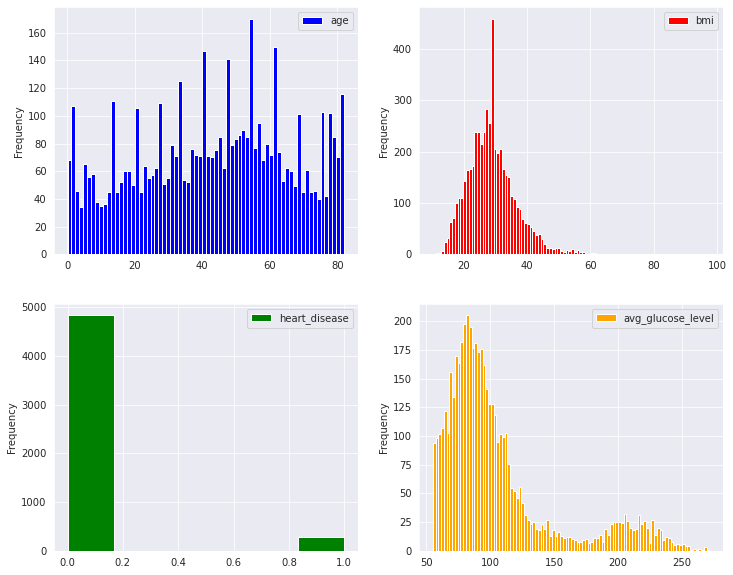

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

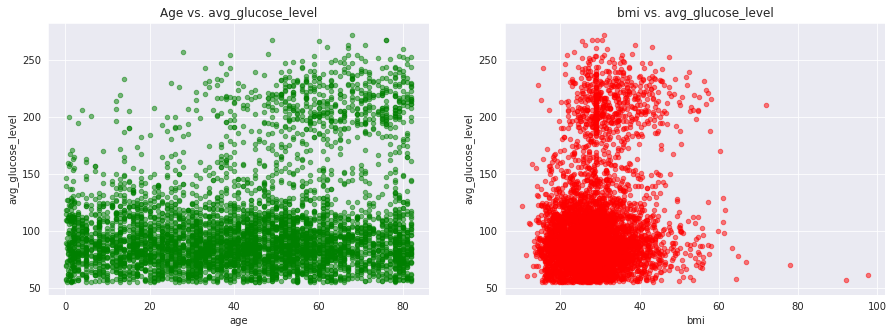

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

<a id="heatmap"></a>
# Heatmap

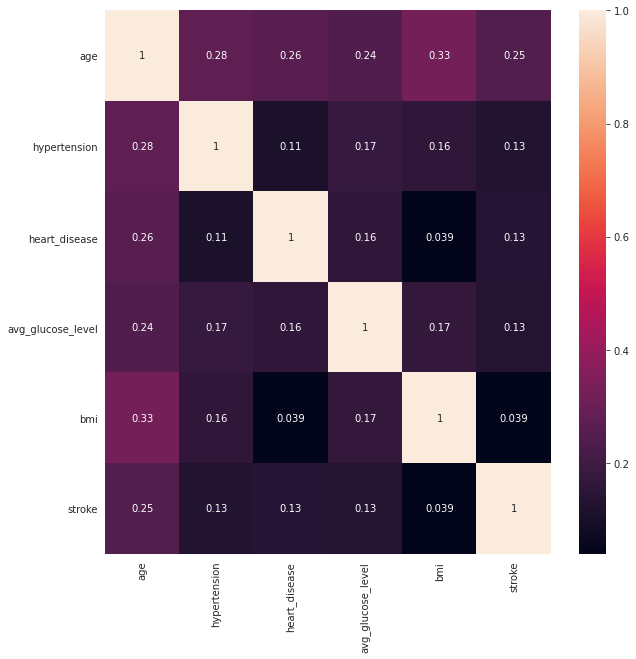

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

<a id="pairplot"></a>
# Pairplot

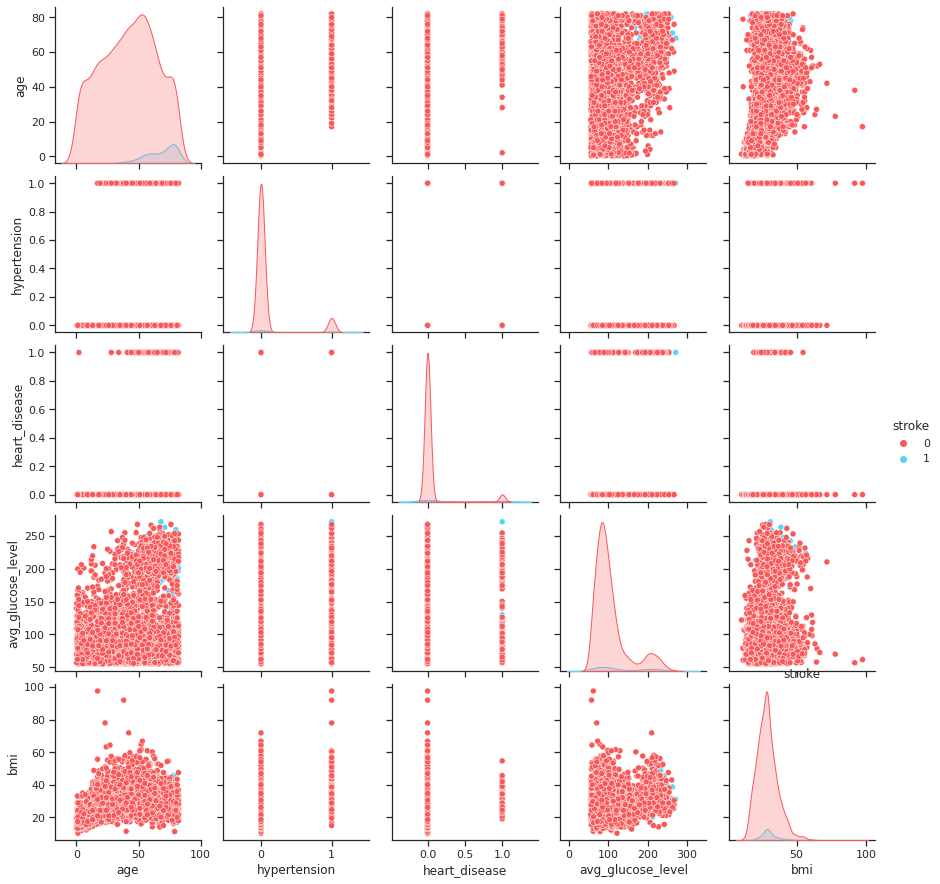

In [25]:
sns.set(style="ticks");
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="stroke", palette=pal);
plt.title("stroke");

<a id="prep"></a>
# Data Preprocessing

<a id="label"></a>
# Label Encoding

In [26]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [27]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
residence_mapping = {'Urban': 0, 'Rural': 1}
df['Residence_type'] = df['Residence_type'].map(residence_mapping)

In [29]:
marriage_mapping = {'No': 0, 'Yes': 1}
df['ever_married'] = df['ever_married'].map(marriage_mapping)

In [30]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,0,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,1,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,1,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,0,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,1,174.12,24.000000,never smoked,1


<a id="ohe"></a>
# One-Hot-Encoding

In [31]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [32]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [33]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [34]:
ohe = OneHotEncoder()

In [35]:
df['gender'] = pd.Categorical(df['gender'])
dfDummies_gender = pd.get_dummies(df['gender'], prefix = 'gender_encoded')
dfDummies_gender

,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [36]:
df['smoking_status'] = pd.Categorical(df['smoking_status'])
dfDummies_smoking_status = pd.get_dummies(df['smoking_status'], prefix = 'smoking_status_encoded')
dfDummies_smoking_status

,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [37]:
df['work_type'] = pd.Categorical(df['work_type'])
dfDummies_work_type = pd.get_dummies(df['work_type'], prefix = 'work_type_encoded')
dfDummies_work_type

,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


In [38]:
df.drop("gender", axis=1, inplace=True)
df.drop("work_type", axis=1, inplace=True)
df.drop("smoking_status", axis=1, inplace=True)

In [39]:
df = pd.concat([df, dfDummies_gender], axis=1)
df = pd.concat([df, dfDummies_work_type], axis=1)
df = pd.concat([df, dfDummies_smoking_status], axis=1)
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,67.0,0,1,1,0,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,1,202.21,28.893237,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,1,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,0,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,1,174.12,24.000000,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,0,83.75,28.893237,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,0,125.20,40.000000,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,1,82.99,30.600000,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,1,166.29,25.600000,0,0,1,0,0,0,1,0,0,0,1,0,0


In [40]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [41]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,hypertension,heart_disease,ever_married,Residence_type,stroke,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes,avg_glucose_level,bmi,age
0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,2.706375,1.001234e+00,1.051434
1,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,2.121559,1.384666e-15,0.786070
2,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,-0.005028,4.685773e-01,1.626390
3,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1.437358,7.154182e-01,0.255342
4,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1.501184,-6.357112e-01,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.494658,1.384666e-15,1.626390
5106,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.420775,1.442949e+00,1.670617
5107,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,-0.511443,2.217363e-01,-0.363842
5108,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1.328257,-4.278451e-01,0.343796


In [42]:
y = df["stroke"]
X = df.drop(['stroke'],axis=1)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5110
Total # of sample in train dataset: 3832
Total # of sample in test dataset: 1278


<a id="ml"></a>
# ML Models

In [44]:
model_lgr = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

confussion matrix
[[1208    0]
 [  69    1]]
-------------------------------------------
Accuracy of Logistic Regression: 94.60093896713614 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       1.00      0.01      0.03        70

    accuracy                           0.95      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.95      0.95      0.92      1278



In [45]:
model_nb = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,nbpred))

confussion matrix
[[ 195 1013]
 [   0   70]]
-------------------------------------------
Accuracy of Naive Bayes model: 20.73552425665102 

-------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.16      0.28      1208
           1       0.06      1.00      0.12        70

    accuracy                           0.21      1278
   macro avg       0.53      0.58      0.20      1278
weighted avg       0.95      0.21      0.27      1278



In [46]:
model_rfc = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=10, random_state=101,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,rf_predicted))

confussion matrix
[[1208    0]
 [  70    0]]
-------------------------------------------
Accuracy of Random Forest: 94.5226917057903 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.95      0.92      1278



In [47]:
model_egb = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=15, max_depth=10,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,xgb_predicted))

[11:22:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[1208    0]
 [  70    0]]
-------------------------------------------
Accuracy of Extreme Gradient Boost: 94.5226917057903 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.95      0.92      1278



In [48]:
model_gb = 'Gradient Boost'
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
gb_predicted = gb.predict(X_test)
gb_conf_matrix = confusion_matrix(y_test, gb_predicted)
gb_acc_score = accuracy_score(y_test, gb_predicted)
print("confussion matrix")
print(gb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Gradient Boosting:",gb_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,gb_predicted))

confussion matrix
[[1206    2]
 [  70    0]]
-------------------------------------------
Accuracy of Gradient Boosting: 94.36619718309859 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.00      0.00      0.00        70

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.94      0.92      1278



In [49]:
model_knn = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,knn_predicted))

confussion matrix
[[1208    0]
 [  70    0]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 94.5226917057903 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.95      0.92      1278



In [50]:
model_dtc = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 5)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,dt_predicted))

confussion matrix
[[1208    0]
 [  70    0]]
-------------------------------------------
Accuracy of DecisionTreeClassifier: 94.5226917057903 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.95      0.92      1278



In [51]:
model_svc = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=5)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,svc_predicted))

confussion matrix
[[1207    1]
 [  70    0]]
-------------------------------------------
Accuracy of Support Vector Classifier: 94.44444444444444 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.00      0.00      0.00        70

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.94      0.92      1278



In [52]:
model_sgd = 'Stochastic Gradient Descent'
sgdc = SGDClassifier(max_iter=5000, random_state=0)
sgdc.fit(X_train, y_train)
sgdc_predicted = sgdc.predict(X_test)
sgdc_conf_matrix = confusion_matrix(y_test, sgdc_predicted)
sgdc_acc_score = accuracy_score(y_test, sgdc_predicted)
print("confussion matrix")
print(sgdc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of : Stochastic Gradient Descent",sgdc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,sgdc_predicted))

confussion matrix
[[1208    0]
 [  69    1]]
-------------------------------------------
Accuracy of : Stochastic Gradient Descent 94.60093896713614 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       1.00      0.01      0.03        70

    accuracy                           0.95      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.95      0.95      0.92      1278



NameError: name 'model_ev' is not defined

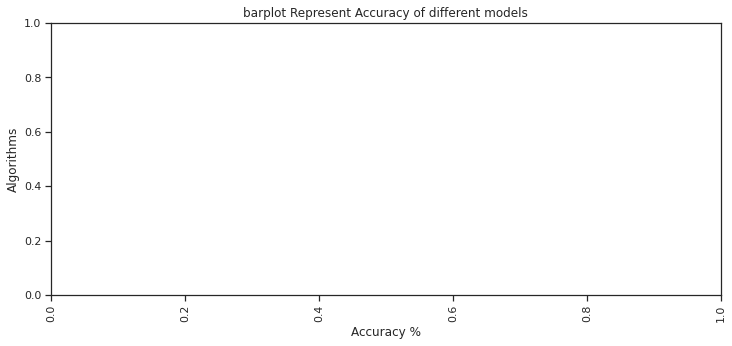

In [53]:
colors = ['red','green','blue','gold','silver','yellow','orange','magenta', 'cyan']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.xticks(rotation=90)
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'], color = colors)
plt.show()

In [54]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost','Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine', 'Stochastic Gradient Descent'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,gb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100, sgdc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,94.600939
1,Naive Bayes,20.735524
2,Random Forest,94.522692
3,Extreme Gradient Boost,94.522692
4,Gradient Boost,94.366197
5,K-Nearest Neighbour,94.522692
6,Decision Tree,94.522692
7,Support Vector Machine,94.444444
8,Stochastic Gradient Descent,94.600939


<a id="conclusion"></a>
# Conclusion

**Other algorithms performed very similar but we have the highest accuracy with logistic regression and Stochastic Gradient Descent (%94.60)**